# idftshift function

### Undoes the effects of iafftshift.

HS = dftshift(H).

HS: Image.

H: Image. DFT image with (0,0) in the center.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys,os
ia898path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

ia636path = os.path.abspath('/home/lotufo/ia636/ia636/')
if ia636path not in sys.path:
    sys.path.append(ia636path)
testing = (__name__ == "__main__")

In [54]:
def Copy_of_4_slices(f):
    f_array = np.asarray(f)
    fx2 = np.concatenate((f_array,f_array),axis=1)
    fx4 = np.concatenate((fx2,fx2))
    return fx4

In [53]:
def Copy_of_4_ImagesDepth(f):
    f_array = np.asarray(f)
    fx2 = np.concatenate((f_array,f_array),axis=1)
    fx4 = np.concatenate((fx2,fx2))
    fx4Depth = np.dstack((fx4,fx4))
    return fx4Depth

In [52]:
def ptrans(f,t):
    g = np.empty(f.shape)
    if f.ndim == 1:
        w = len(f);
        ti=t
        ti = (-t + w) % w # mapeamento inverso para w com translação en t (eixo X)
        fx2 = np.append(f, f)
        g = fx2[ti:ti+w]
    elif f.ndim == 2: 
        h,w = f.shape
        ti = t;
        ti[0] = (-t[0] + h) % h # mapeamento inverso para h com translação en t[0] (eixo Y)
        ti[1] = (-t[1] + w) % w # mapeamento inverso para w com translação en t[1] (eixo X)
        i4 = Copy_of_4_slices(f)
        g = i4[ti[0]:ti[0]-h,ti[1]:ti[1]+w]
    elif f.ndim == 3:
        z,h,w = f.shape
        ti = t
        ti[0] = (-t[0] + z) % z # mapeamento inverso para z com translação en t[0] (eixo Z)
        ti[1] = (-t[1] + h) % h # mapeamento inverso para h com translação en t[1] (eixo Y)
        ti[2] = (-t[1] + w) % w # mapeamento inverso para w com translação en t[2] (eixo X)
        i4 = Copy_of_4_ImagesDepth(x3d)
        g = i4[ti[0]:ti[0]+z,ti[1]:ti[1]-h,ti[2]:ti[2]+w]
    return g

In [51]:
if testing:    
    l = np.array([1,2,3,4,5,6])
    x=np.array([[1,2,3],[4,5,6],[7,8,9]])
    x3d = x.reshape(1,x.shape[0],x.shape[1])
    print('teste 1 d')
    %timeit ptrans(l,3)
    %timeit ia.ptrans(l,3)
    print('teste 2 d')
    %timeit ptrans(x,[1,2])
    %timeit ia.ptrans(x,[1,2])
    print('teste 3 d')
    %timeit ptrans(x3d,[1,2,1])
    %timeit ia.ptrans(x3d,[1,2,1])

teste 1 d
The slowest run took 9.57 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.03 µs per loop
The slowest run took 6.80 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 11 µs per loop
teste 2 d
The slowest run took 4.86 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 9.5 µs per loop
10000 loops, best of 3: 49.9 µs per loop
teste 3 d
The slowest run took 4.57 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 19.1 µs per loop
10000 loops, best of 3: 62.7 µs per loop


""
ptrans
""
ia.ptrans

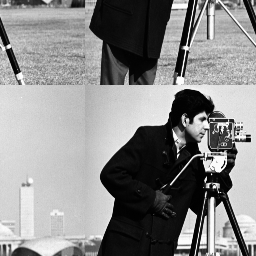
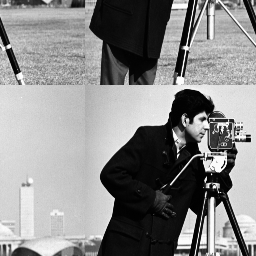

teste
The slowest run took 21.42 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 62.3 µs per loop
100 loops, best of 3: 2.26 ms per loop


In [50]:
if testing:    
    f = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif')
    g1= ptrans(f, np.array(f.shape)//3)
    g2 =ia.ptrans(f, np.array(f.shape)//3)
    nb = ia.nbshow(2)
    nb.nbshow(g1,title='ptrans')
    nb.nbshow(g2,title='ia.ptrans')
    nb.nbshow()
    print('teste')
    %timeit ptrans(f,np.array(f.shape)//3)
    %timeit ia.ptrans(f,np.array(f.shape)//3)

In [34]:
def dftshift(f):
    return ptrans(f, np.array(f.shape)//2)

In [49]:
def idftshift(f):
    return ptrans(f, np.ceil(-np.array(np.shape(f))/2).astype(np.int))

""
""

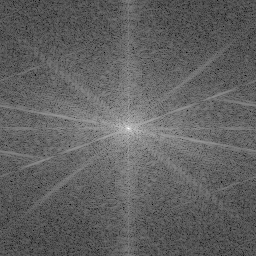

""
""

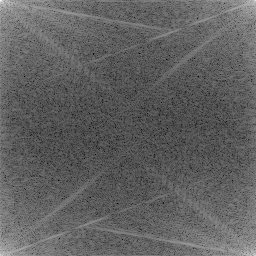

""
""

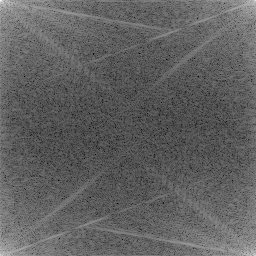

""
""

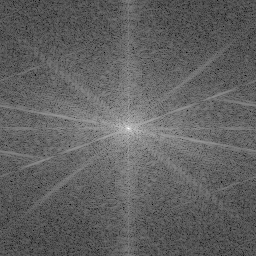

In [48]:
f = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif')
F = ia.dft(f)
Fs = ia.dftshift(F)
Fs1 = dftshift(F)
iFs1 = idftshift(Fs1)
ia.adshow(ia.dftview(F))
ia.adshow(ia.dftview(Fs))
ia.adshow(ia.dftview(Fs1))
ia.adshow(ia.dftview(iFs1))